In [1]:
import pandas as pd 
import nltk 
import re

from nltk.stem.snowball import SnowballStemmer, ArabicStemmer


from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
# nltk.download("all", quiet= True)

[trail01](https://www.kaggle.com/code/haithemhermessi/arabic-text-classification-using-deep-learning/notebook)

##### more advanced stemming tool 

##### 1. Tashaphyne

In [4]:
# !pip install Tashaphyne

In [5]:
from tashaphyne.stemming import ArabicLightStemmer

In [6]:
arabic_stemming = ArabicLightStemmer()

In [7]:
arabic_stemming.light_stem("فسيكفيكهم")

'سيكفيك'

In [8]:
arabic_stemming.get_stem()

'سيكفيك'

In [9]:
arabic_stemming.get_root()

'كفي'

In [10]:
arabic_stemming.get_suffix()

'كهم'

In [11]:
# arabic_stemming.prefix_list

In [12]:
def get_stemming(word):
    arabic_stemming = ArabicLightStemmer()
    return (
        arabic_stemming.light_stem(word),
        arabic_stemming.get_stem(),
        arabic_stemming.get_root(),
        arabic_stemming.get_prefix(),
        arabic_stemming.get_suffix(),
        arabic_stemming.get_affix()
    )

In [13]:
get_stemming("سيكفيكهم")

('سيكفيك', 'سيكفيك', 'كفي', 'سي', 'كهم', 'سي-كهم')

##### farasapy [ref](https://github.com/MagedSaeed/farasapy)


In [14]:
!pip install -U farasapy

In [15]:
from farasa.pos import FarasaPOSTagger
from farasa.ner import FarasaNamedEntityRecognizer
from farasa.diacratizer import FarasaDiacritizer
from farasa.segmenter import FarasaSegmenter
from farasa.stemmer import FarasaStemmer


# # https://r12a.github.io/scripts/tutorial/summaries/arabic
# sample = """
# يُشار إلى أن اللغة العربية يتحدثها أكثر من 422 مليون نسمة ويتوزع متحدثوها في المنطقة المعروفة باسم الوطن العربي بالإضافة إلى العديد من المناطق الأخرى المجاورة مثل الأهواز وتركيا وتشاد والسنغال وإريتريا وغيرها.     وهي اللغة الرابعة من لغات منظمة الأمم المتحدة الرسمية الست منذ 99/9/1999. /
# """


# """
# ---------------------
# non interactive mode
# ---------------------
# """
# print("original sample:", sample)
# print("----------------------------------------")
# print("Farasa features, noninteractive mode.")
# print("----------------------------------------")
# segmenter = FarasaSegmenter()
# segmented = segmenter.segment(sample)
# print("sample segmented:", segmented)
# print("----------------------------------------------")

# stemmer = FarasaStemmer()
# stemmed = stemmer.stem(sample)
# print("sample stemmed:", stemmed)
# print("----------------------------------------------")

# pos_tagger = FarasaPOSTagger()
# pos_tagged = pos_tagger.tag(sample)
# print("sample POS Tagged", pos_tagged)
# print("----------------------------------------------")

# pos_tagger_interactive = FarasaPOSTagger()
# pos_tagged_interactive = pos_tagger_interactive.tag_segments(sample)
# print("sample POS Tagged Segments", pos_tagged_interactive)
# print("----------------------------------------------")

# named_entity_recognizer = FarasaNamedEntityRecognizer()
# named_entity_recognized = named_entity_recognizer.recognize(sample)
# print("sample named entity recognized:", named_entity_recognized)
# print("----------------------------------------------")

# diacritizer = FarasaDiacritizer()
# diacritized = diacritizer.diacritize(sample)
# print("sample diacritized:", diacritized)
# print("----------------------------------------------")

# """
# ---------------------
# interactive mode
# ---------------------
# """
# print("----------------------------------------")
# print("Farasa features, interactive mode.")
# print("----------------------------------------")

# segmenter_interactive = FarasaSegmenter(interactive=True)
# segmented_interactive = segmenter_interactive.segment(sample)
# print("sample segmented (interactive):", segmented_interactive)
# print("----------------------------------------------")

# stemmer_interactive = FarasaStemmer(interactive=True)
# stemmed_interactive = stemmer_interactive.stem(sample)
# print("sample stemmed (interactive):", stemmed_interactive)
# print("----------------------------------------------")

# pos_tagger_interactive = FarasaPOSTagger(interactive=True)
# pos_tagged_interactive = pos_tagger_interactive.tag(sample)
# print("sample POS Tagged (interactive)", pos_tagged_interactive)
# print("----------------------------------------------")

# pos_tagger_interactive = FarasaPOSTagger(interactive=True)
# pos_tagged_interactive = pos_tagger_interactive.tag_segments(sample)
# print("sample POS Tagged Segments (interactive)", pos_tagged_interactive)
# print("----------------------------------------------")

# named_entity_recognizer_interactive = FarasaNamedEntityRecognizer(interactive=True)
# named_entity_recognized_interactive = named_entity_recognizer_interactive.recognize(
#     sample
# )
# print(
#     "sample named entity recognized (interactive):", named_entity_recognized_interactive
# )
# print("----------------------------------------------")

# diacritizer_interactive = FarasaDiacritizer(interactive=True)
# diacritized_interactive = diacritizer_interactive.diacritize(sample)
# print("sample diacritized (interactive):", diacritized_interactive)
# print("----------------------------------------------")

In [16]:
# stemmer = FarasaStemmer()

In [30]:
df = pd.read_csv("Data/final_data_ar.csv")

In [32]:
df.rename(columns= {"arabic_class": "class", "arabic_text": "text"}, inplace=True)
df = df[["text", "class"]]

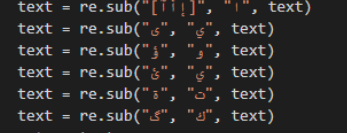

#### Preprocessing 

In [33]:

#the stemmer requires a language parameter
snow_stemmer = SnowballStemmer(language='arabic')

In [39]:
def normalize_text(text):
    """
        this function used to convert all letter to standar ones 
        
    """
    
    return text # due to all the given text is translated from google translate we don't need to  normalize
    text = text.strip()
    text = re.sub("[إأٱآا]", "ا", text)
    text = re.sub("ى" , "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة" , "ه", text)
    text = re.sub("[ًٌٍَُِّ]", "", text)
    return text

def basic_cleaning(text):
    """
        this function used to perform the basic cleaning steps like 
            1. remove digit 
            2. remove repeated words 
            3. remove emojis 
            4. remove hashtage and 
        
    """
    
    #the stemmer requires a language parameter
    text =  " ".join([ snow_stemmer.stem(word) for word in text.split()])
    text = normalize_text(text)
    # use the Ascii code to detect arabic letters only 
    text = re.sub(r'[^0-9\u0600-\u06ff\u0750-\u077f\ufb50-\ufbc1\ufbd3-\ufd3f\ufd50-\ufd8f\ufd50-\ufd8f\ufe70-\ufefc\uFDF0-\uFDFD]+', ' ', text)
    # remove digits 
    text = re.sub("[0-9]+", "", text)
    text = re.sub("[#@$%^&*!.,’/،ـ÷×٪؛<>؟~]", "", text)
    # stemmer      
    text = " ".join([get_stemming(word)[1] for word in text.split()])
    
    text = " ".join([ word for word in text.split() if not (word in arb_stopwords or word in normalized_arb_stopwords)])
    return text

In [40]:
get_stemming("اريد")

('ريد', 'ريد', 'ورد', 'ا', '', 'ا-')

In [41]:
arb_stopwords = set(nltk.corpus.stopwords.words("arabic"))
normalized_arb_stopwords = [normalize_text(sw) for sw in arb_stopwords]

In [42]:
df.iloc[:1]["text"].apply(basic_cleaning).iloc[0]

'ريد قول شكر جزيل رد واصل قط تاكد نن موافق'

In [43]:
df.loc[0, "text"]

'RTmaideeeni: أريد أن أقول شكراً جزيلاً لكل فرد منكم تواصل معي ، فقط للتأكد من أنني موافق'

In [44]:
df.iloc[:10]["text"].apply(basic_cleaning).iloc[5]

'حديث حساس مفرط قاح حال ملي قاح غض دقيق'

In [45]:
df.loc[5, "text"]

'RTEricTopol: تحديث للحساسية المفرطة من لقاحات mRNA: 66 حالة من ~ 18 مليون لقاح (= 0.00000003٪). الكل ما عدا 1 في غضون 11 دقيقة'

In [46]:
df["clean_text"] = df["text"].apply(basic_cleaning)

In [47]:
df["clean_text"].iloc[39765]

'طير شوف ريم طير جب حتاج'

In [48]:
df.head(3)

,text,class,clean_text
0,RTmaideeeni: أريد أن أقول شكراً جزيلاً لكل فرد...,القلق,ريد قول شكر جزيل رد واصل قط تاكد نن موافق
1,تضمين التغريدة أنا فقط بحاجة إلى 320! شكرا على...,وحيد,ضم غريد قط حاج لى شكر رص
2,SAD_istfied سأبكي / نقاط البيع,ضغط عصبى,ساب قاط يع


In [49]:
df.loc[5, "clean_text"]`

'حديث حساس مفرط قاح حال ملي قاح غض دقيق'

In [56]:
# df.to_csv("cleaned1.csv", encoding="utf-8")

In [17]:
df = pd.read_csv("cleaned1.csv")

#### Feature extraction 

In [118]:
from sklearn import preprocessing, model_selection, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn import decomposition, ensemble



from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error


from sklearn.pipeline import make_pipeline

In [101]:
# Lsampleels encode the target variable
encoder = preprocessing.LabelEncoder()
df['class'] = encoder.fit_transform(df['class'])
# The following is the data after encoding.
df['class'].value_counts()

0    12585
2    10022
1     8599
3     8560
Name: class, dtype: int64

In [102]:
X = df['clean_text'].values.astype("U")
Y = df['class'].values.astype("U")

In [103]:
Xtrain, Xtest, Ytrain, Ytest = model_selection.train_test_split(X, Y, stratify= Y)

In [104]:
df['clean_text'].values

array(['ريد قول شكر جزيل رد واصل قط تاكد نن موافق',
       'ضم غريد قط حاج لى شكر رص', 'ساب قاط يع', ...,
       'ثير مرح ثلج تاب يام ثلج لد وم مدهش تاب مشار ركو يض عليق مد صف حقق تاب بد كء فضل وم ثلج طلاق يس',
       'حساس جد قت ترانس كتشف زملاء غرف مر وم طرد شق حرفي فد دموع حتاج قط لى مساعد دق وم ثني رسوم دق يل شيء ساعد مساعد متبادل',
       'طير شوف ريم طير جب حتاج'], dtype=object)

In [105]:
from sklearn.linear_model import LogisticRegression

In [106]:
# pipe = make_pipeline(TfidfVectorizer(),
#                     LogisticRegression())
# # make param grid
# param_grid = {'logisticregression__C': [0.01, 0.1, 1, 10, 100]}

# # create and fit the model
# model = model_selection.GridSearchCV(pipe, param_grid, cv=5)
# model.fit(Xtrain,Ytrain)

In [107]:
import numpy as np 

In [108]:
X = X.astype(np.unicode_)

In [109]:
type(X[0])

numpy.str_

In [110]:
# Feature Engineering

cv = CountVectorizer()
cv.fit_transform(X)
cv_xtrain =  cv.transform(Xtrain)
cv_xtest =  cv.transform(Xtest)


# The following is word-level TF-IDF.
tv = TfidfVectorizer()
tv.fit_transform(X)

# Transform the training and validation data using TF-IDF object.
tv_xtrain =  tv.transform(Xtrain)
tv_xtest =  tv.transform(Xtest)

In [111]:
def build(model_initializer, independent_variables_training, target, independent_variable_test):
    # fit
    model_initializer.fit(independent_variables_training, target)
    # predict
    modelPred = model_initializer.predict(independent_variable_test)
    return metrics.accuracy_score(modelPred, Ytest)

In [112]:
output = build(naive_bayes.MultinomialNB(), cv_xtrain, Ytrain, cv_xtest)
print(f"count vector : {output}")

output = build(naive_bayes.MultinomialNB(), tv_xtrain, Ytrain, tv_xtest)
print(f"tfidf vector : {output}")

count vector : 0.6516797425065379
tfidf vector : 0.6256286461476565


In [113]:
#for cv
output = build(svm.SVC(), cv_xtrain, Ytrain, cv_xtest)
print(f"count vector: {output}")
#for TF-IDF
output = build(svm.SVC(), tv_xtrain, Ytrain, tv_xtest)
print(f"tfidf vector : {output}")

count vector: 0.776000804667069
tfidf vector : 0.7743914705290686


In [114]:
# for CV
output = build(linear_model.LogisticRegression(), cv_xtrain, Ytrain, cv_xtest)
print(f"count vector: {output}")
# for TF-IDF
output = build(linear_model.LogisticRegression(), tv_xtrain, Ytrain, tv_xtest)

print(f"tfidf vector : {output}")

count vector: 0.76020921343794
tfidf vector : 0.7459263729631865


In [117]:
#for CV
output = build(ensemble.RandomForestClassifier(), cv_xtrain, Ytrain, cv_xtest)
print(f"count vector: {output}")

#for TF-IDF
output = build(ensemble.RandomForestClassifier(), tv_xtrain, Ytrain, tv_xtest)
print(f"tfidf vector : {output}")

count vector: 0.7775095554214444
tfidf vector : 0.780124723395695


In [119]:
classifier = ensemble.RandomForestClassifier().fit(tv_xtrain, Ytrain)
val_predictions = classifier.predict(tv_xtest)
# Precision , Recall , F1 - score , Support
y_true, y_pred = Ytest, val_predictions
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.67      0.71      3146
           1       0.94      0.89      0.91      2150
           2       0.81      0.90      0.86      2506
           3       0.64      0.69      0.66      2140

    accuracy                           0.78      9942
   macro avg       0.79      0.79      0.79      9942
weighted avg       0.78      0.78      0.78      9942

